In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[(0.0, 0.4666666666666667, 0.7333333333333333),
 (0.0, 0.6, 0.5333333333333333),
 (0.9333333333333333, 0.4666666666666667, 0.2),
 (0.8, 0.2, 0.06666666666666667),
 (0.2, 0.7333333333333333, 0.9333333333333333),
 (0.9333333333333333, 0.2, 0.4666666666666667),
 (0.7333333333333333, 0.7333333333333333, 0.7333333333333333),
 (0.0, 0.0, 0.0)]

In [34]:
maps = pd.read_csv("../outputs/stats_maps_non_cpg.tsv", sep="\t", usecols=["csq","maps","ci95"])

In [42]:
maps["csq"] = pd.Categorical(
    maps["csq"],
    categories=[
        "synonymous",
        "missense",
        "nonsense",
        "nmd_target",
        "long_exon",
        "distal_nmd",
        "start_proximal",
    ],
)
maps = maps.sort_values("csq", ascending=True)

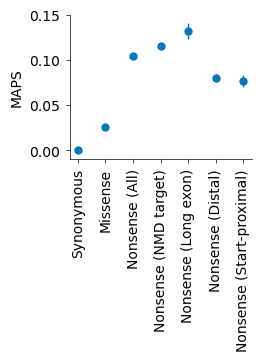

In [76]:
def plot_maps(df, ax):
    ax.errorbar(x=df["csq"], y=df["maps"], yerr=df["ci95"], linestyle="None")
    ax.scatter(x=df["csq"], y=df["maps"])
    ax.set_ylabel("MAPS")
    ax.set_ylim(-0.01,0.15)
    ax.set_xticks(
        ticks=[
            "synonymous",
            "missense",
            "nonsense",
            "nmd_target",
            "long_exon",
            "distal_nmd",
            "start_proximal",
        ],
        labels=[
            "Synonymous",
            "Missense",
            "Nonsense (All)",
            "Nonsense (NMD target)",
            "Nonsense (Long exon)",
            "Nonsense (Distal)",
            "Nonsense (Start-proximal)",
        ],
        rotation=90,
        ha="center",
        #rotation_mode="anchor"
    );

fig, ax = plt.subplots(figsize=(2.5, 3.5), layout="constrained")
plot_maps(maps, ax)